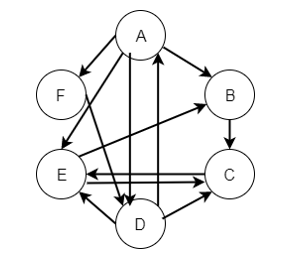

* A: B, D, E, F
* B: C
* C: E
* D: A,C,E
* E: B,C
* F: D

#### networkx实现

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 有向图
G = nx.DiGraph()

In [3]:
# 边
edges = [('A','B'), ('A','D'), ('A','E'), ('A','F'),
         ('B','C'), ('C','E'), ('D','A'), ('D','C'),
         ('D','E'), ('E','B'), ('E','C'), ('F','D')]
# 加边
for edge in edges:
    G.add_edge(edge[0], edge[1])

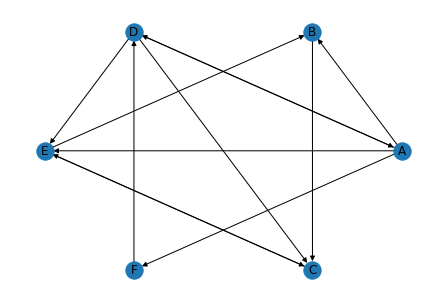

In [4]:
# 可视化
layout = nx.shell_layout(G)
nx.draw(G, pos=layout, with_labels=True, hold=False)
plt.show()

In [9]:
# 简化模型
rank_list = nx.pagerank(G, alpha=1)
sorted(rank_list.items(), key=lambda x: x[1], reverse=True)

[('E', 0.40000101720462666),
 ('C', 0.39999872837747247),
 ('B', 0.20000025428691245),
 ('D', 6.554246553540412e-11),
 ('A', 4.362295028000273e-11),
 ('F', 2.182304589249693e-11)]

In [10]:
# 随机模型
random_rank_list = nx.pagerank(G, alpha=0.85)
type(random_rank_list)

dict

In [11]:
random_rank_list.items()

dict_items([('A', 0.04288042051996868), ('B', 0.17901275990207988), ('D', 0.0631073657542518), ('E', 0.3409441105134389), ('F', 0.034112089475917554), ('C', 0.3399432538343432)])

In [12]:
# 字典按value排序
sorted(random_rank_list.items(), key=lambda item: item[1], reverse=True)

[('E', 0.3409441105134389),
 ('C', 0.3399432538343432),
 ('B', 0.17901275990207988),
 ('D', 0.0631073657542518),
 ('A', 0.04288042051996868),
 ('F', 0.034112089475917554)]

* 可以看到，在简化模型中，ADF三个点的权重是十分小的，几乎可以看作是0，而随机模型中，这三个的的权重来到了小数点后两位

Python实现

In [13]:
import numpy as np

# 6 * 6
# 先横向记录每个点的情况，再转置
a = np.array([[0,1/4,0,1/4,1/4,1/4],
          [0,0,1,0,0,0],
          [0,0,0,0,1,0],
          [1/3,0,1/3,0,1/3,0],
          [0,1/2,1/2,0,0,0],
          [0,0,0,1,0,0]]).T                       # 别忘了转置

b = np.array([1/6,1/6,1/6,1/6,1/6,1/6])           # 每个点的初始权值

In [14]:
# 简化模型
w = b
for i in range(100):
    w = np.dot(a, w)
    print(w)

[0.05555556 0.125      0.30555556 0.20833333 0.26388889 0.04166667]
[0.06944444 0.14583333 0.32638889 0.05555556 0.38888889 0.01388889]
[0.01851852 0.21180556 0.3587963  0.03125    0.36226852 0.01736111]
[0.01041667 0.18576389 0.40335648 0.02199074 0.37384259 0.00462963]
[0.00733025 0.18952546 0.38001543 0.0072338  0.4132909  0.00260417]
[0.00241127 0.20847801 0.39858218 0.00443673 0.38425926 0.00183256]
[0.00147891 0.19273245 0.40208655 0.00243538 0.4006639  0.00060282]
[8.11792695e-04 2.00701678e-01 3.93876190e-01 9.72543724e-04
 4.03268068e-01 3.69727366e-04]
[3.24181241e-04 2.01836982e-01 4.02659894e-01 5.72675540e-04
 3.94403319e-01 2.02948174e-04]
[1.90891847e-04 1.97282705e-01 3.99229534e-01 2.83993484e-04
 4.02931831e-01 8.10453104e-05]
[9.46644947e-05 2.01513638e-01 3.98843285e-01 1.28768272e-04
 3.99371921e-01 4.77229617e-05]
[4.29227573e-05 1.99709627e-01 4.01242522e-01 7.13890854e-05
 3.98909874e-01 2.36661237e-05]
[2.37963618e-05 1.99465667e-01 3.99188360e-01 3.43968130e-0

In [15]:
# 随机模型
w = b
d=0.85  # 阻尼因子，随机浏览任意网页
for i in range(100):
    w = (1-d)/a.shape[0] + d*np.dot(a, w)
    print(w)

[0.07222222 0.13125    0.28472222 0.20208333 0.24930556 0.06041667]
[0.08225694 0.14630208 0.29977431 0.09170139 0.33961806 0.04034722]
[0.05098206 0.18681727 0.3196765  0.07677474 0.32326982 0.0424796 ]
[0.04675284 0.17322336 0.3429372  0.07194135 0.32931156 0.03583369]
[0.04538338 0.17489239 0.33258065 0.06539361 0.34681498 0.03493498]
[0.04352819 0.18204034 0.33958309 0.0643387  0.33586571 0.03464397]
[0.0432293  0.17699267 0.34070651 0.06369711 0.34112467 0.03424974]
[0.04304752 0.17916421 0.33846927 0.06329851 0.34183428 0.03418623]
[0.04293458 0.17942716 0.34050372 0.06320589 0.33978105 0.0341476 ]
[0.04290834 0.17853054 0.33982837 0.06314906 0.3414601  0.0341236 ]
[0.04289223 0.17923856 0.33976374 0.06312308 0.34086437 0.03411802]
[0.04288487 0.17898196 0.34010501 0.06311492 0.34079865 0.0341146 ]
[0.04288256 0.17895246 0.33985665 0.06311044 0.34108485 0.03411304]
[0.04288129 0.17907361 0.33995195 0.06310862 0.34087199 0.03411254]
[0.04288078 0.17898287 0.33996394 0.06310794 0.3